# Fase 1
## A01736690 - José Ashamat Jaimes Saavedra
### MLOps

# EDA

In [44]:
# ==== 1. Importación de librerías ====
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [45]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [46]:
# Configuraciones globales
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10,6)

In [47]:
PATH = '/gdrive/MyDrive/Colab Notebooks/MLOps/data/f1/power_tetouan_city_modified.csv'
df = pd.read_csv(PATH)

In [48]:
df.head(10)

DateTime Temperature Humidity Wind Speed general diffuse flows  \
0  1/1/2017 0:00       6.559     73.8      0.083                 0.051   
1  1/1/2017 0:10       6.414     74.5      0.083                  0.07   
2  1/1/2017 0:20       6.313     74.5       0.08                 0.062   
3  1/1/2017 0:30       6.121     75.0      0.083                0.091    
4  1/1/2017 0:40       5.921    75.7       0.081                 0.048   
5  1/1/2017 0:50       5.853     76.9      0.081                 0.059   
6  1/1/2017 1:00       5.641     77.7       0.08                 0.048   
7  1/1/2017 1:10       5.496     78.2      0.085                 0.055   
8  1/1/2017 1:20       5.678     78.1      0.081                 0.066   
9  1/1/2017 1:30       5.491     77.3      0.082                 0.062   

  diffuse flows Zone 1 Power Consumption Zone 2  Power Consumption  \
0           NaN               34055.6962              16128.87538    
1         0.085              29814.68354               19375.07599   
2           0.1              29128.10127               19006.68693   
3         0.096              28228.86076               18361.09422   
4         0.085               27335.6962               17872.34043   
5         0.108              26624.81013               17416.41337   
6         0.096              25998.98734              16993.31307    
7         0.093              25446.07595               16661.39818   
8         0.141              24777.72152               16227.35562   
9         0.111              24279.49367               15939.20973   

  Zone 3  Power Consumption mixed_type_col  
0               20240.96386            624  
1               20131.08434            811  
2              19668.43373         unknown  
3               18899.27711            bad  
4               18442.40964            879  
5               18130.12048            801  
6               17945.06024        unknown  
7               17459.27711        unknown  
8               17025.54217            924  
9               16794.21687            173

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53464 entries, 0 to 53463
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   DateTime                   52977 non-null  object
 1   Temperature                52880 non-null  object
 2   Humidity                   52826 non-null  object
 3   Wind Speed                 52846 non-null  object
 4   general diffuse flows      52838 non-null  object
 5   diffuse flows              52849 non-null  object
 6   Zone 1 Power Consumption   52861 non-null  object
 7   Zone 2  Power Consumption  52839 non-null  object
 8   Zone 3  Power Consumption  52889 non-null  object
 9   mixed_type_col             48162 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


In [50]:
# ==== 3. Revisión inicial ====
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nDuplicados en el dataset:", df.duplicated().sum())

Dimensiones del dataset: (53464, 10)

Tipos de datos:
DateTime                     object
Temperature                  object
Humidity                     object
Wind Speed                   object
general diffuse flows        object
diffuse flows                object
Zone 1 Power Consumption     object
Zone 2  Power Consumption    object
Zone 3  Power Consumption    object
mixed_type_col               object
dtype: object

Valores nulos por columna:
 DateTime                      487
Temperature                   584
Humidity                      638
Wind Speed                    618
general diffuse flows         626
diffuse flows                 615
Zone 1 Power Consumption      603
Zone 2  Power Consumption     625
Zone 3  Power Consumption     575
mixed_type_col               5302
dtype: int64

Duplicados en el dataset: 6


In [51]:
# ==== 4. Conversión de tipos ====
df["DateTime"] = pd.to_datetime(df["DateTime"].astype(str).str.strip(), format='mixed', dayfirst=True, errors='coerce')

In [52]:
# Revisar si hay fechas no convertidas (NaT)
invalid_dates = df["DateTime"].isna().sum()
print(f"Fechas no convertibles: {invalid_dates}")

Fechas no convertibles: 508


In [53]:
invalid_df = df[df["DateTime"].isna()]
print("Ejemplos de fechas no convertibles:")
print(invalid_df["DateTime"].head(10))

Ejemplos de fechas no convertibles:
127   NaT
266   NaT
285   NaT
345   NaT
426   NaT
514   NaT
540   NaT
610   NaT
844   NaT
899   NaT
Name: DateTime, dtype: datetime64[ns]


In [54]:
# Quitar espacios y caracteres no numéricos excepto signo, punto o coma
for col in df.columns:
    if col != "DateTime":  # evitamos tocar la columna de fechas
        df[col] = (
            df[col]
            .astype(str)
            .str.strip()
            .str.replace(",", ".", regex=False)  # cambia coma decimal por punto
            .str.replace(r"[^0-9.\-]", "", regex=True)  # elimina texto o símbolos
        )

In [55]:
# Intentar convertir todas las columnas (excepto DateTime) a numéricas
for col in df.columns:
    if col != "DateTime":
        df[col] = pd.to_numeric(df[col])

In [56]:
print("\nTipos de datos después de la conversión:")
print(df.dtypes)
print("\nValores nulos por columna:")
print(df.isna().sum())


Tipos de datos después de la conversión:
DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
mixed_type_col                      float64
dtype: object

Valores nulos por columna:
DateTime                       508
Temperature                    791
Humidity                       835
Wind Speed                     801
general diffuse flows          824
diffuse flows                  807
Zone 1 Power Consumption       801
Zone 2  Power Consumption      788
Zone 3  Power Consumption      748
mixed_type_col               16086
dtype: int64


In [57]:
# ==== 5. Estadísticos descriptivos ====
print("\nEstadísticos descriptivos:")
display(df.describe().T)


Estadísticos descriptivos:


count                           mean  \
DateTime                     52956  2017-07-01 22:55:31.055970816   
Temperature                52673.0                      27.500015   
Humidity                   52629.0                      91.937896   
Wind Speed                 52663.0                       5.508786   
general diffuse flows      52640.0                     226.813446   
diffuse flows              52657.0                      99.795767   
Zone 1 Power Consumption   52663.0                    42609.30818   
Zone 2  Power Consumption  52676.0                   26337.961038   
Zone 3  Power Consumption  52716.0                   22834.552185   
mixed_type_col             37378.0                     498.229921   

                                           min                  25%  \
DateTime                   2017-01-01 00:00:00  2017-04-01 22:17:30   
Temperature                              3.247                14.46   
Humidity                                 11.34                58.43   
Wind Speed                                0.05                0.078   
general diffuse flows                    0.004                0.062   
diffuse flows                            0.011                0.122   
Zone 1 Power Consumption            13895.6962          26373.03519   
Zone 2  Power Consumption          8560.081466          17003.81816   
Zone 3  Power Consumption           5935.17407          13154.04255   
mixed_type_col                             0.0                247.0   

                                           50%                  75%  \
DateTime                   2017-07-01 22:35:00  2017-09-30 21:52:30   
Temperature                               18.9                23.07   
Humidity                                  70.1                 81.7   
Wind Speed                               0.086                4.915   
general diffuse flows                    6.293                329.0   
diffuse flows                            5.707                103.6   
Zone 1 Power Consumption           32338.46154          37424.05316   
Zone 2  Power Consumption          20859.31486         24791.370792   
Zone 3  Power Consumption          16441.44578         21786.994452   
mixed_type_col                           495.0                751.0   

                                           max            std  
DateTime                   2017-12-30 23:50:00            NaN  
Temperature                           28149.24     162.802131  
Humidity                              118972.8     596.274797  
Wind Speed                           14337.903      77.152587  
general diffuse flows                  69797.0    1229.724575  
diffuse flows                          44602.8     575.519649  
Zone 1 Power Consumption        45599468.93026  247051.986817  
Zone 2  Power Consumption        2958428.29954   88761.993222  
Zone 3  Power Consumption        3566782.19464   82979.472672  
mixed_type_col                           999.0     289.515754

In [58]:
PATH = '/gdrive/MyDrive/Colab Notebooks/MLOps/data/f1/power_tetouan_city_modified_typed.csv'
df.to_csv(PATH, index=False)

In [59]:
cond_temp = (df['Temperature'] < -10) | (df['Temperature'] > 80)
cond_hum = (df['Humidity'] < 0) | (df['Humidity'] > 100)
cond_wind = (df['Wind Speed'] < 0) | (df['Wind Speed'] > 50)

print("Valores anómalos:")
print("Temperature:", cond_temp.sum())
print("Humidity:", cond_hum.sum())
print("Wind Speed:", cond_wind.sum())

Valores anómalos:
Temperature: 537
Humidity: 562
Wind Speed: 353


In [60]:
df.loc[cond_temp, 'Temperature'] = np.nan
df.loc[cond_hum, 'Humidity'] = np.nan
df.loc[cond_wind, 'Wind Speed'] = np.nan

In [61]:
zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
print("\nDetección de outliers por IQR en consumo energético:")

for col in zones:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))
    outlier_count = outliers.sum()
    print(f"  {col}: {outlier_count} registros ({outlier_count/len(df)*100:.2f}%) fuera del rango IQR.")


Detección de outliers por IQR en consumo energético:
  Zone 1 Power Consumption: 274 registros (0.51%) fuera del rango IQR.
  Zone 2  Power Consumption: 246 registros (0.46%) fuera del rango IQR.
  Zone 3  Power Consumption: 1381 registros (2.58%) fuera del rango IQR.


In [62]:
for col in zones:
    upper_limit = df[col].quantile(0.99)
    df.loc[df[col] > upper_limit, col] = upper_limit

In [63]:
print("\nEstadísticos después de limpieza:")
display(df.describe().T)


Estadísticos después de limpieza:


count                           mean  \
DateTime                     52956  2017-07-01 22:55:31.055970816   
Temperature                52136.0                      18.822726   
Humidity                   52067.0                      68.249157   
Wind Speed                 52310.0                       1.969953   
general diffuse flows      52640.0                     226.813446   
diffuse flows              52657.0                      99.795767   
Zone 1 Power Consumption   52663.0                   32439.522619   
Zone 2  Power Consumption  52676.0                   21106.952259   
Zone 3  Power Consumption  52716.0                   17940.352972   
mixed_type_col             37378.0                     498.229921   

                                           min                  25%  \
DateTime                   2017-01-01 00:00:00  2017-04-01 22:17:30   
Temperature                              3.247                14.42   
Humidity                                 11.34                58.29   
Wind Speed                                0.05                0.078   
general diffuse flows                    0.004                0.062   
diffuse flows                            0.011                0.122   
Zone 1 Power Consumption            13895.6962          26373.03519   
Zone 2  Power Consumption          8560.081466          17003.81816   
Zone 3  Power Consumption           5935.17407          13154.04255   
mixed_type_col                             0.0                247.0   

                                           50%                  75%  \
DateTime                   2017-07-01 22:35:00  2017-09-30 21:52:30   
Temperature                               18.8                22.91   
Humidity                                 69.86                 81.4   
Wind Speed                               0.086                4.915   
general diffuse flows                    6.293                329.0   
diffuse flows                            5.707                103.6   
Zone 1 Power Consumption           32338.46154          37424.05316   
Zone 2  Power Consumption          20859.31486         24791.370792   
Zone 3  Power Consumption          16441.44578         21786.994452   
mixed_type_col                           495.0                751.0   

                                           max          std  
DateTime                   2017-12-30 23:50:00          NaN  
Temperature                              40.01     5.812768  
Humidity                                  94.8    15.555432  
Wind Speed                               49.24     2.391812  
general diffuse flows                  69797.0  1229.724575  
diffuse flows                          44602.8   575.519649  
Zone 1 Power Consumption           49231.69811  7198.254311  
Zone 2  Power Consumption         34248.235658  5257.515001  
Zone 3  Power Consumption         40927.091305  6755.384732  
mixed_type_col                           999.0   289.515754

In [64]:
(df[['Temperature', 'Humidity', 'Wind Speed']] < 0).sum()
(df[['Temperature', 'Humidity']] > 100).sum()

Temperature    0
Humidity       0
dtype: int64

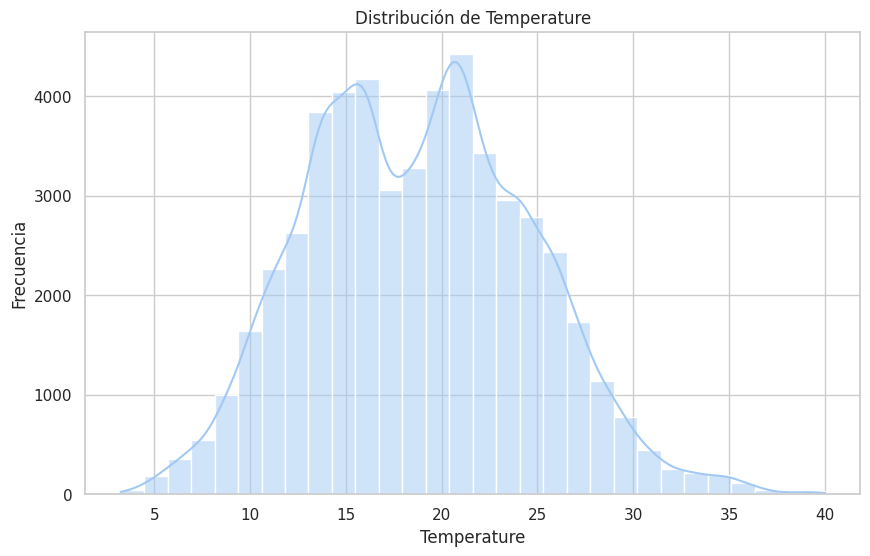

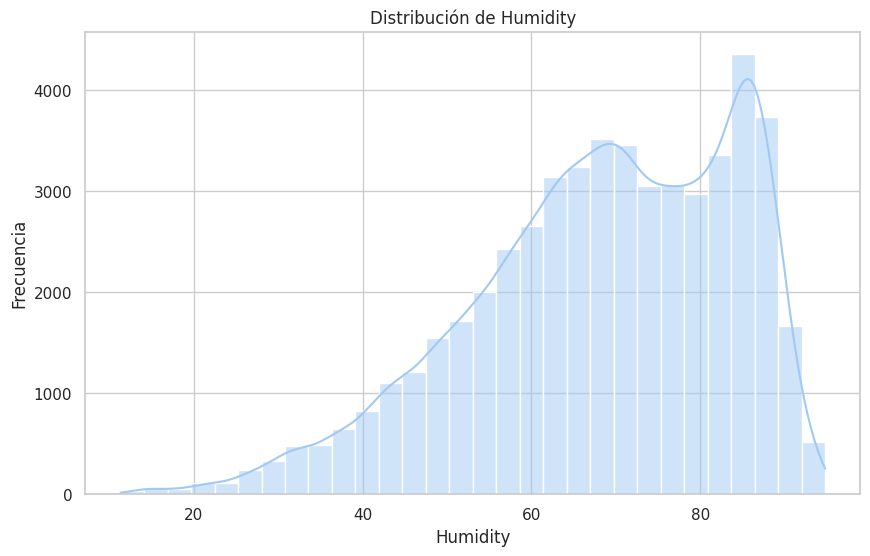

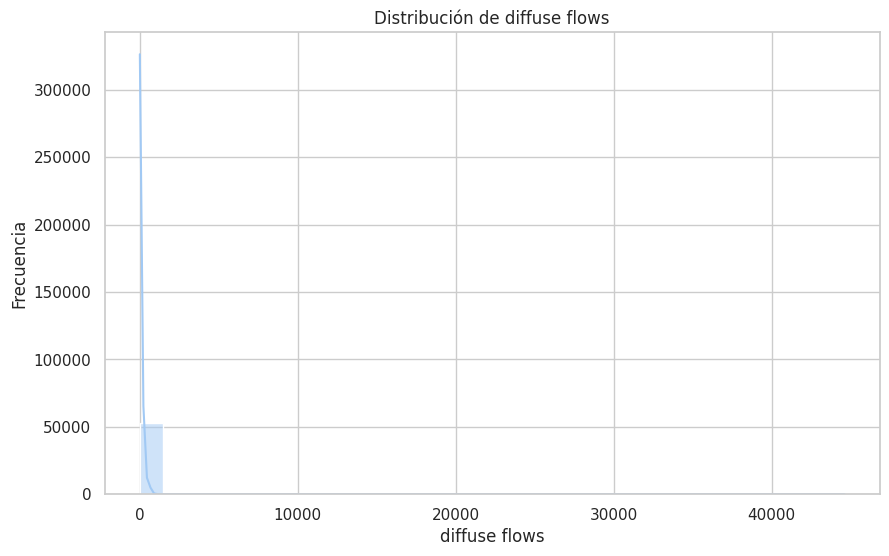

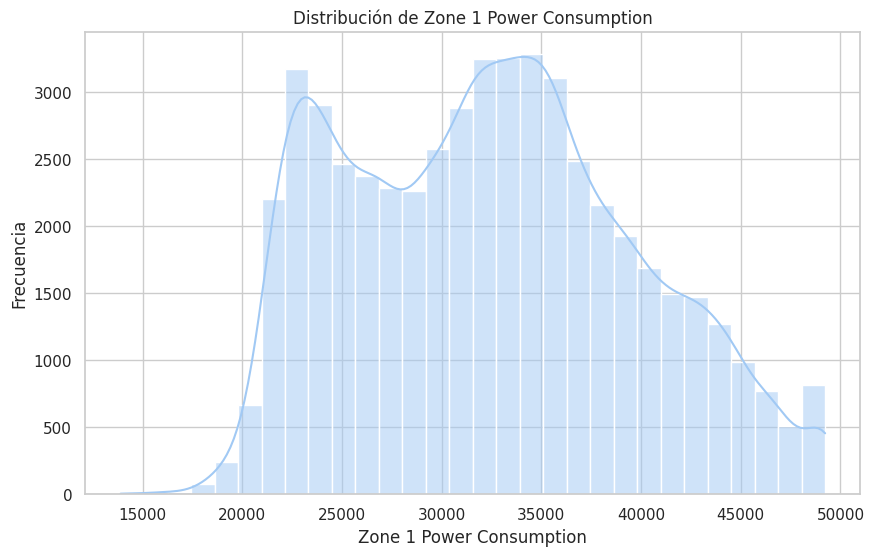

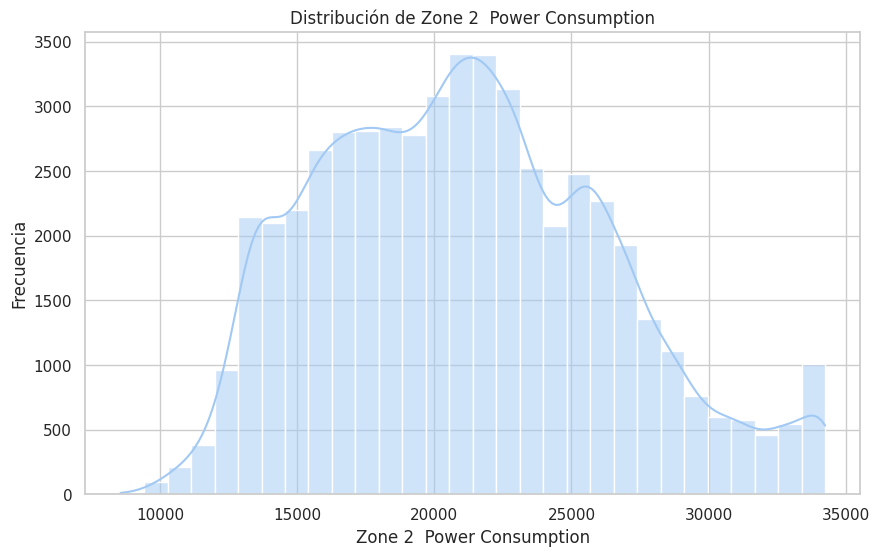

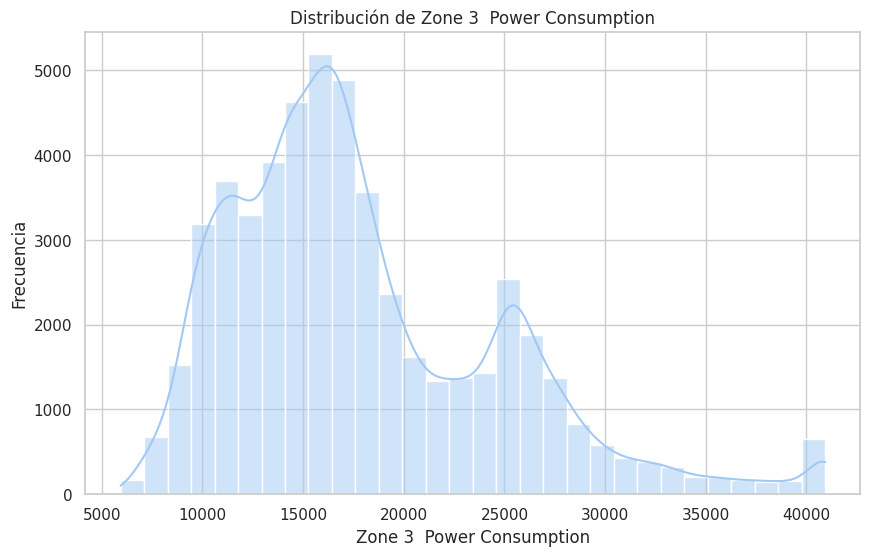

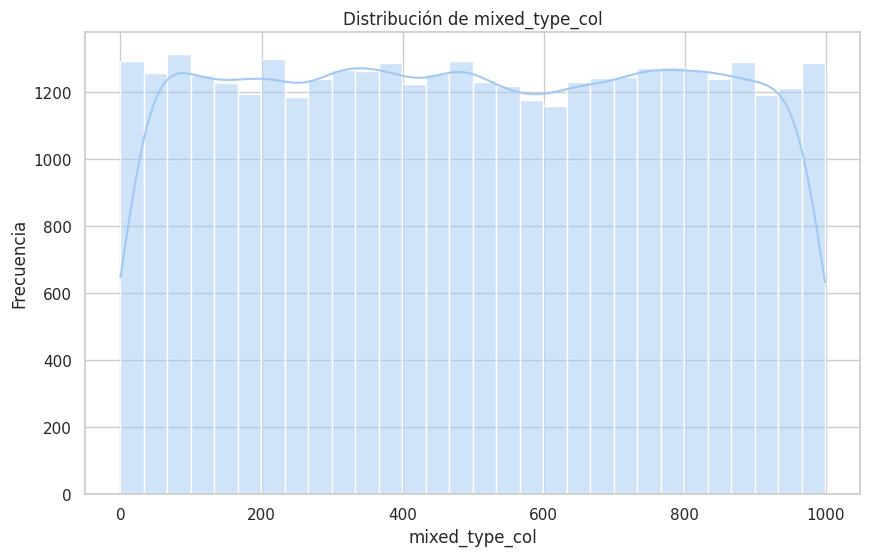

In [23]:
# ==== 6. Distribución de variables numéricas ====
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

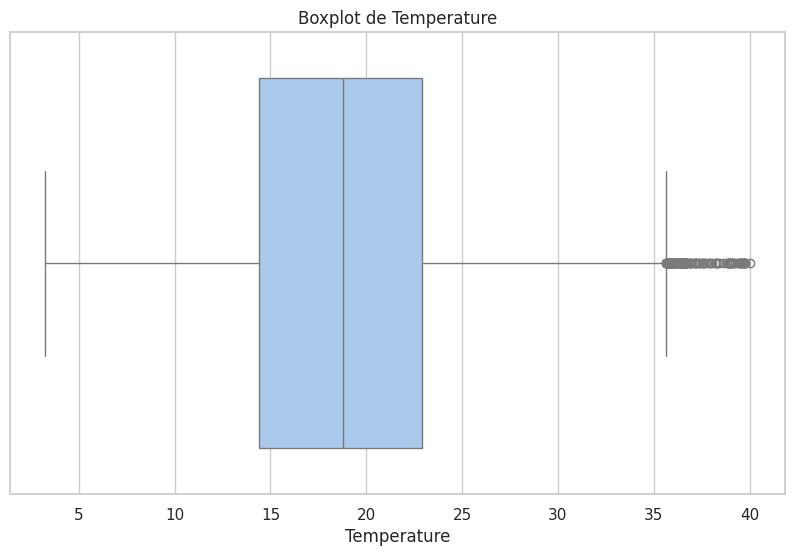

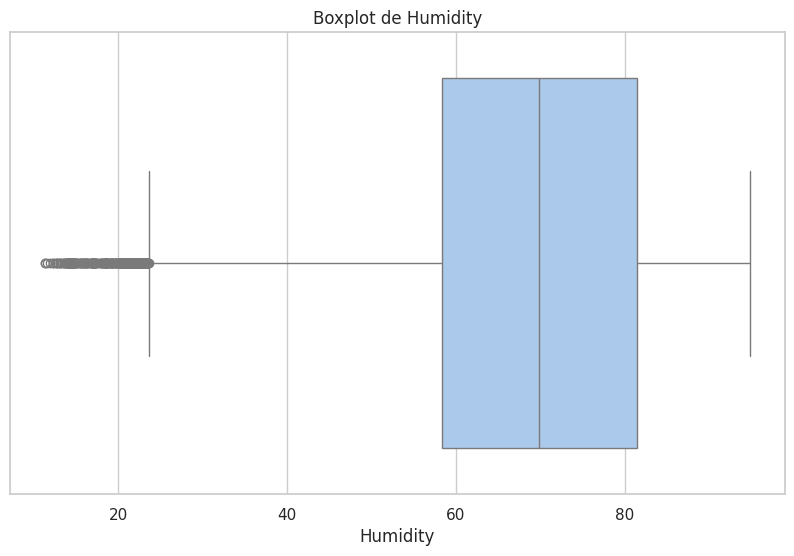

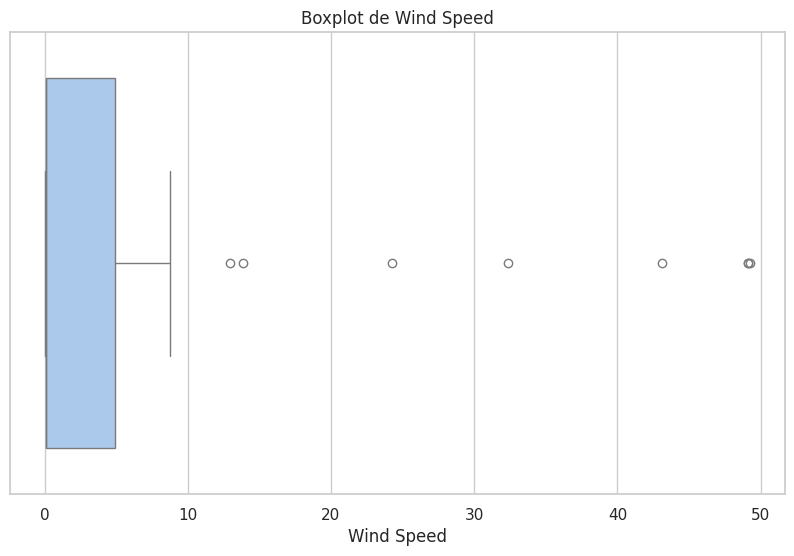

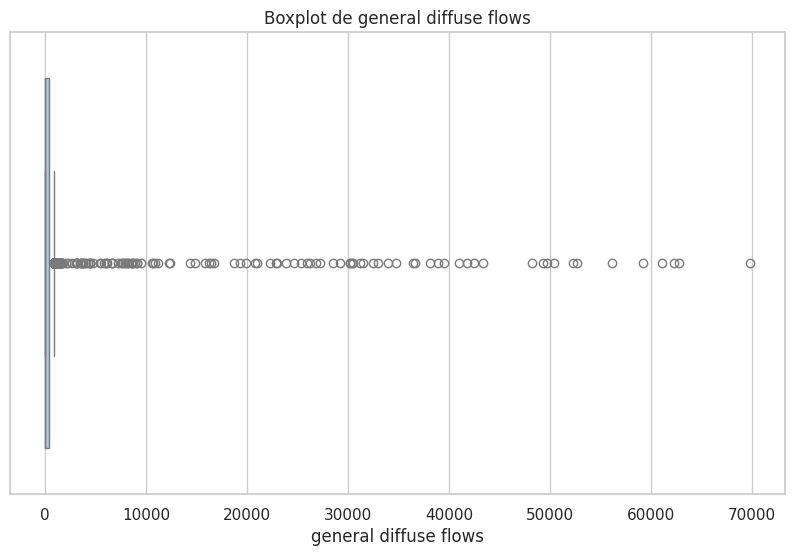

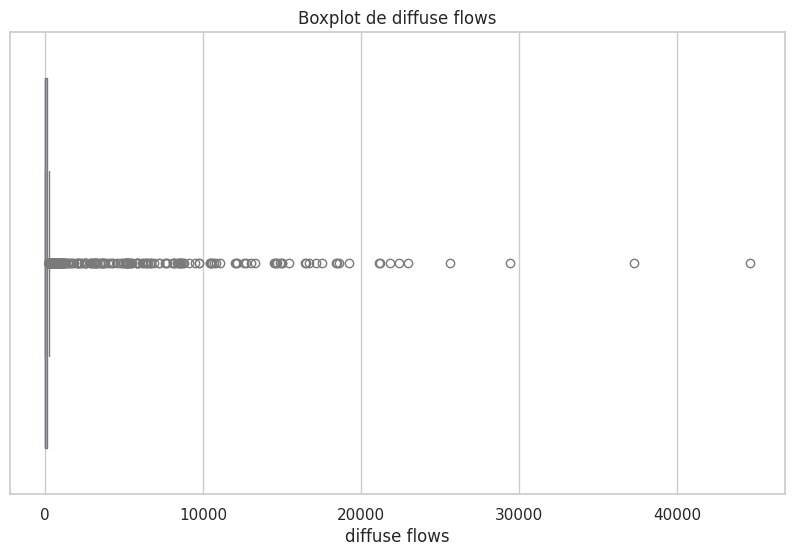

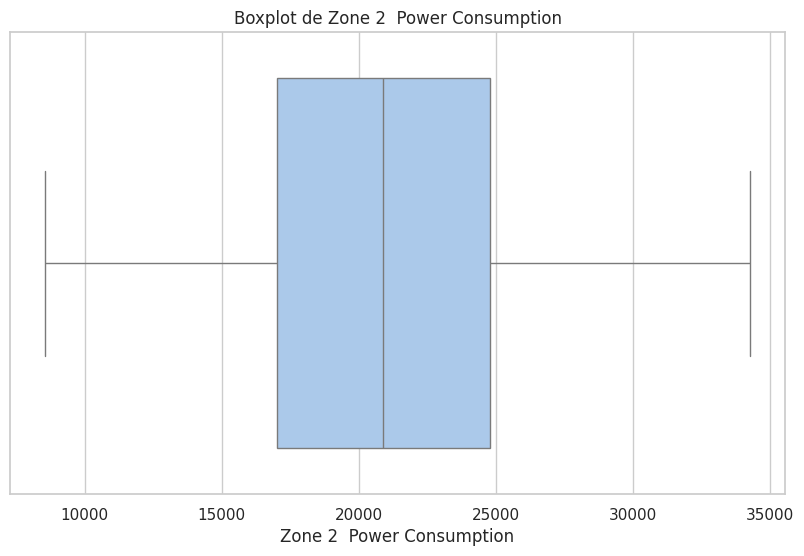

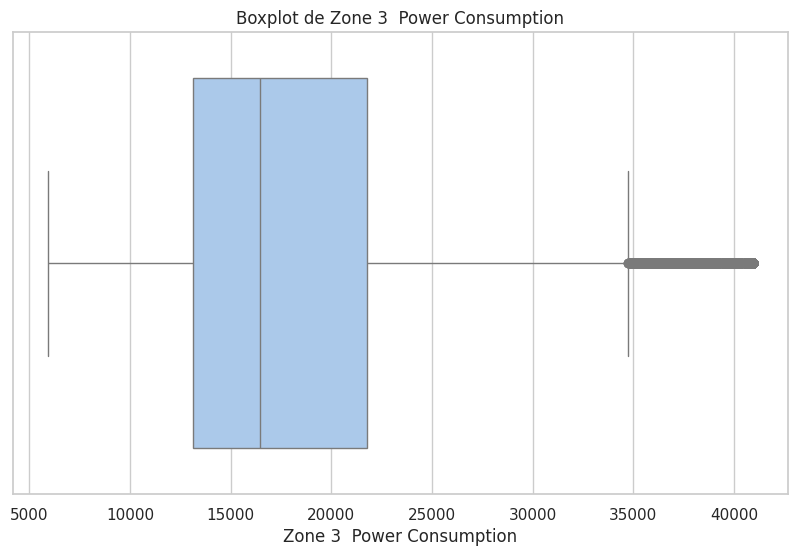

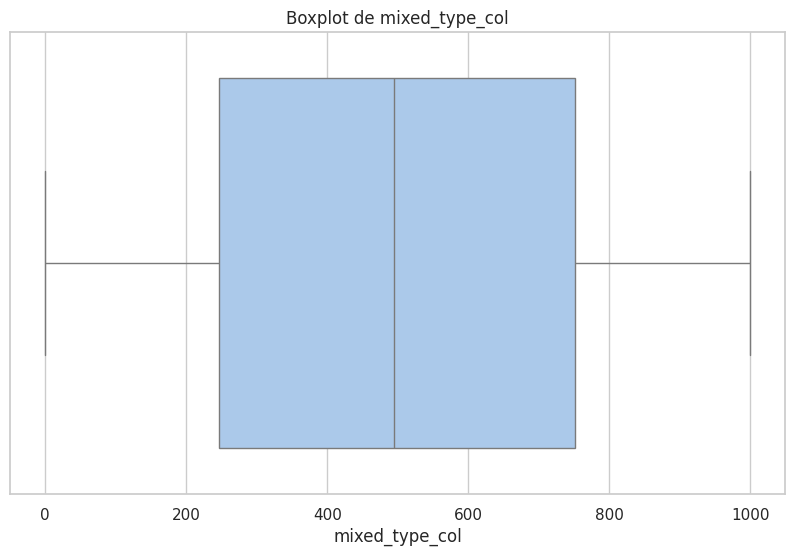

In [24]:
# ==== 7. Boxplots para detectar outliers ====
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


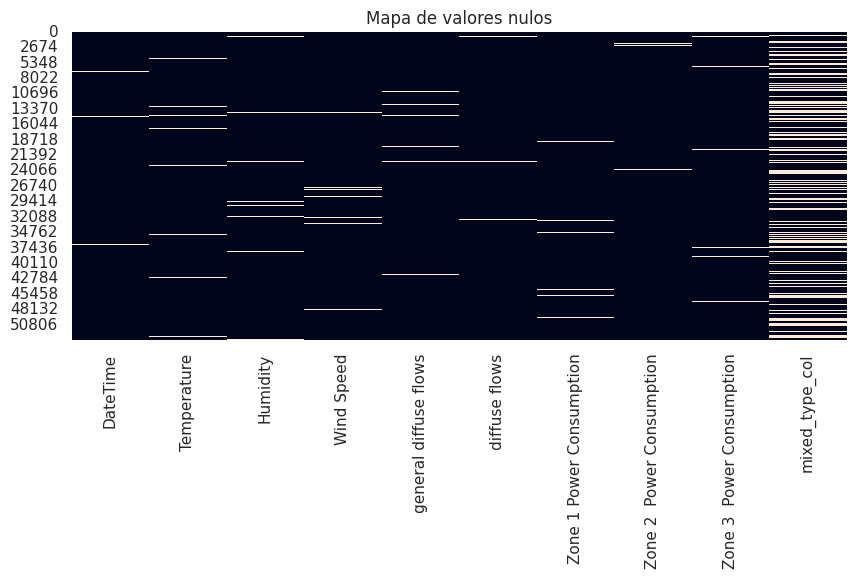

In [25]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()

In [26]:
print(df.columns)

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
       'mixed_type_col'],
      dtype='object')


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


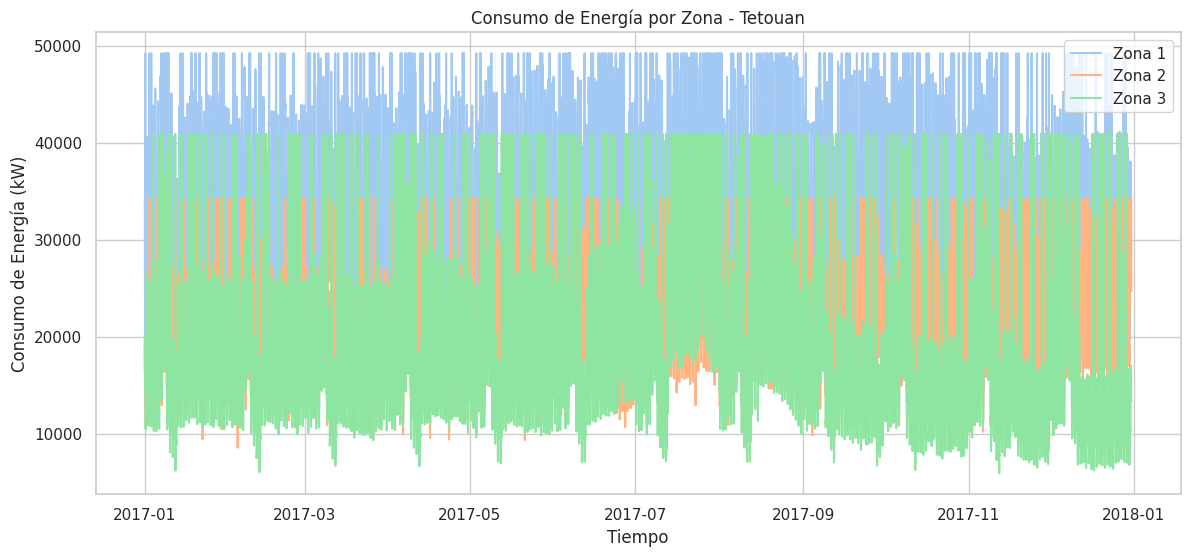

In [27]:
# ==== 8. Análisis temporal ====
plt.figure(figsize=(14,6))
sns.lineplot(x='DateTime', y='Zone 1 Power Consumption', data=df, label='Zona 1')
sns.lineplot(x='DateTime', y='Zone 2  Power Consumption', data=df, label='Zona 2')
sns.lineplot(x='DateTime', y='Zone 3  Power Consumption', data=df, label='Zona 3')
plt.title('Consumo de Energía por Zona - Tetouan')
plt.xlabel('Tiempo')
plt.ylabel('Consumo de Energía (kW)')
plt.legend()
plt.show()

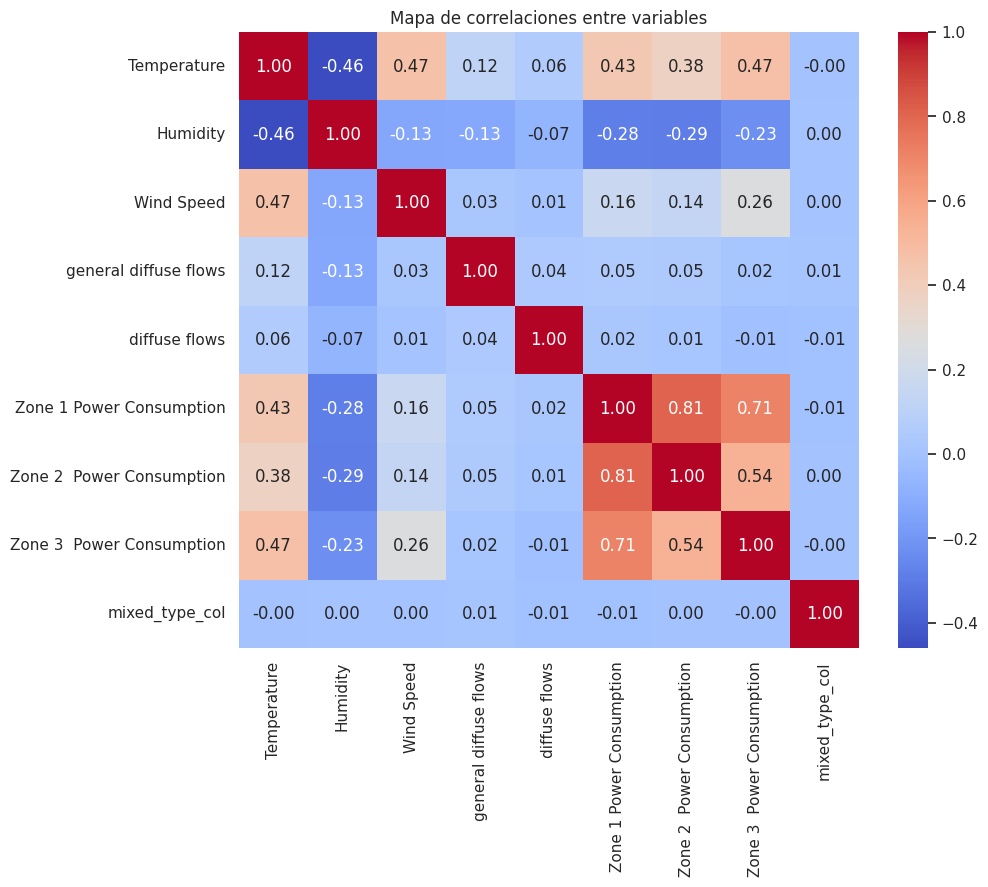

In [28]:
# ==== 9. Correlaciones ====
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones entre variables")
plt.show()

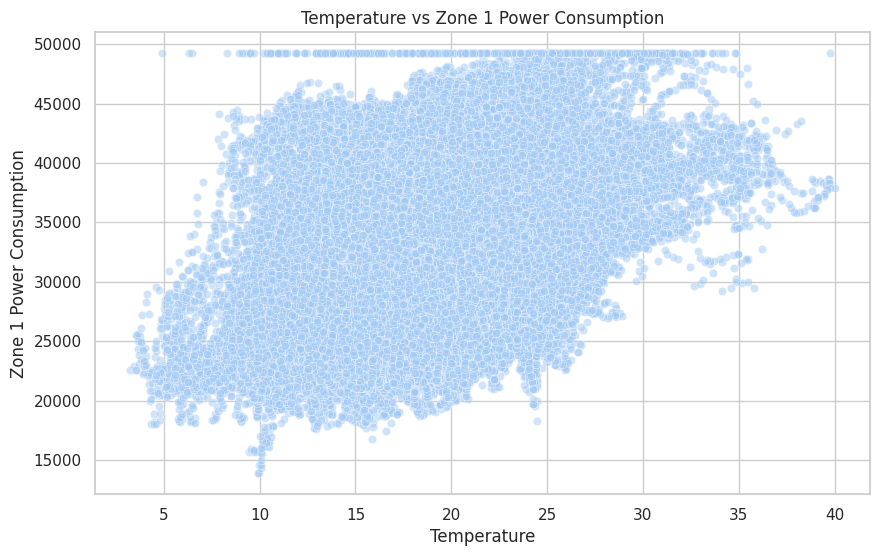

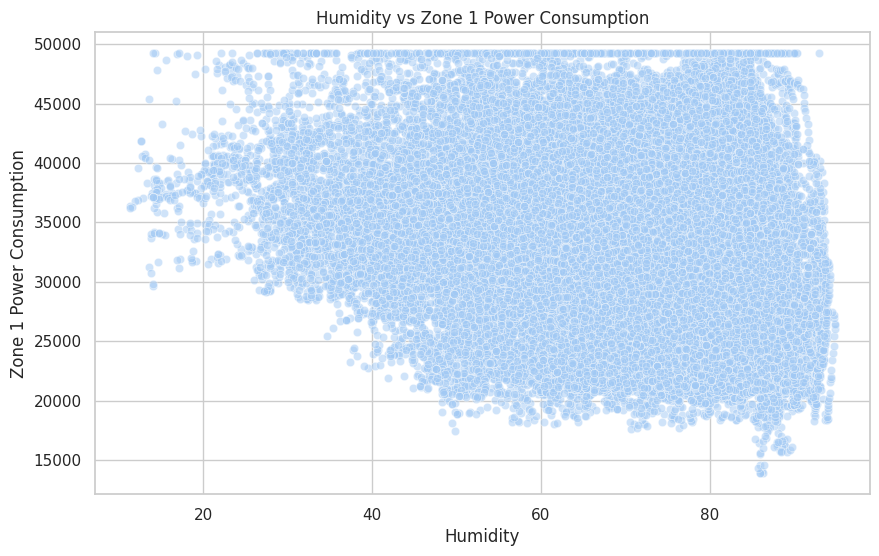

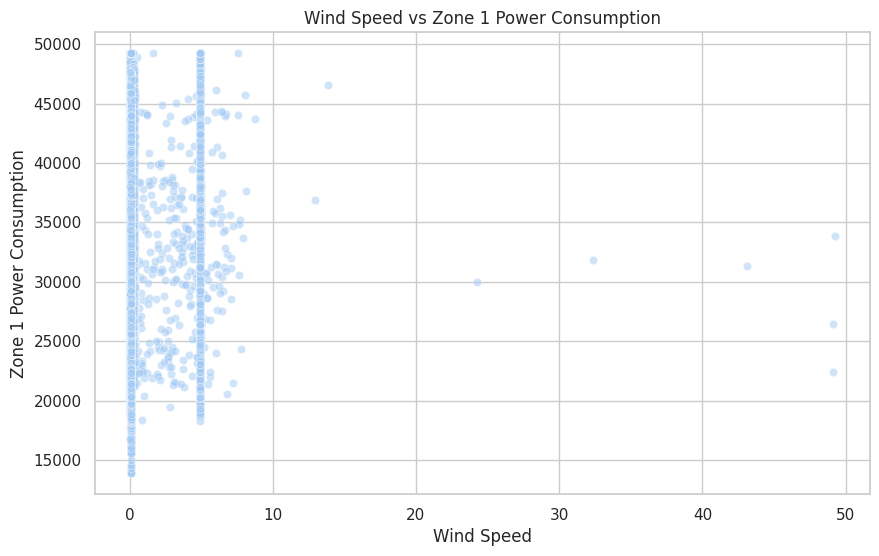

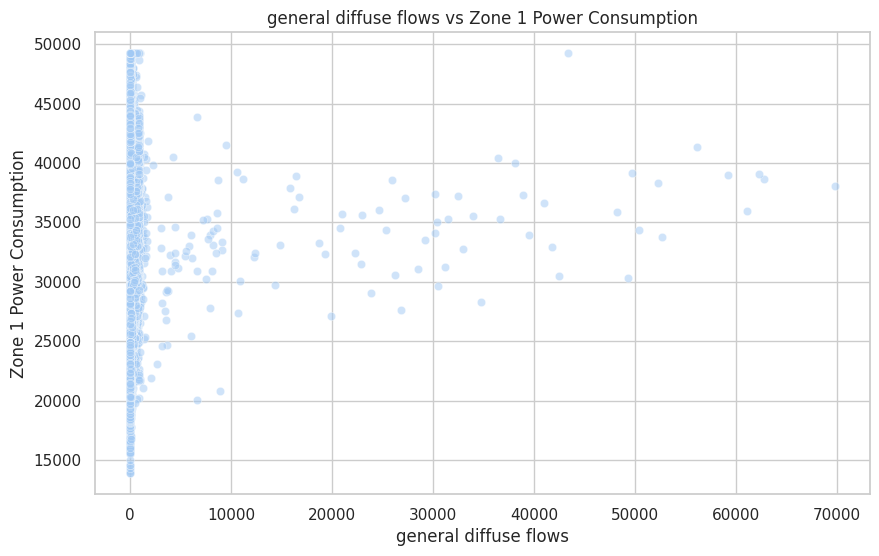

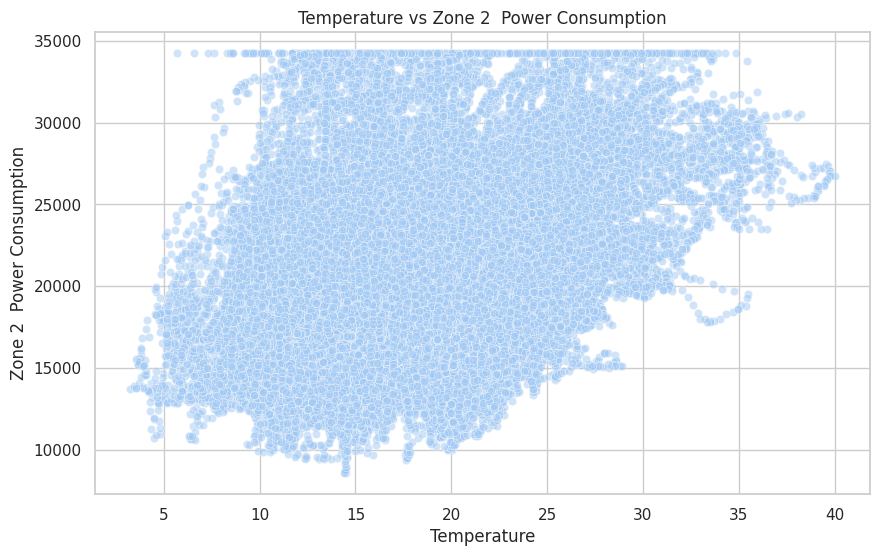

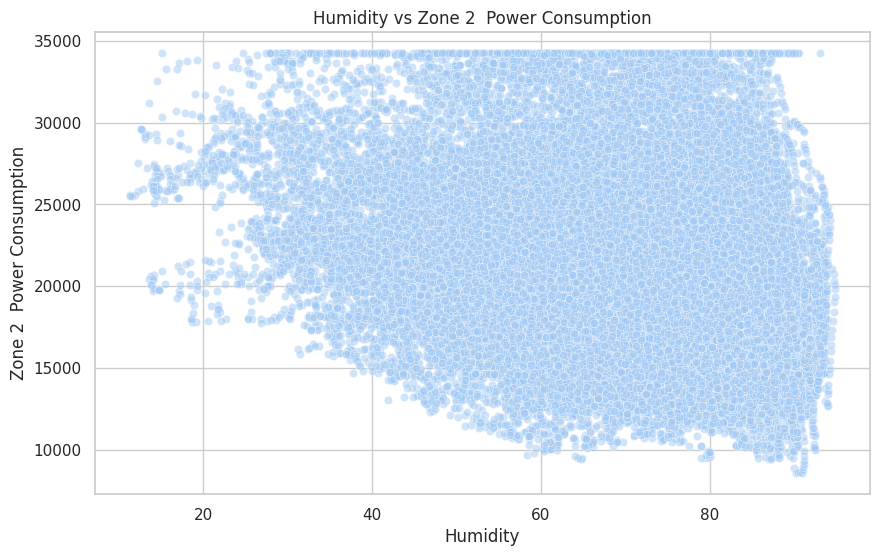

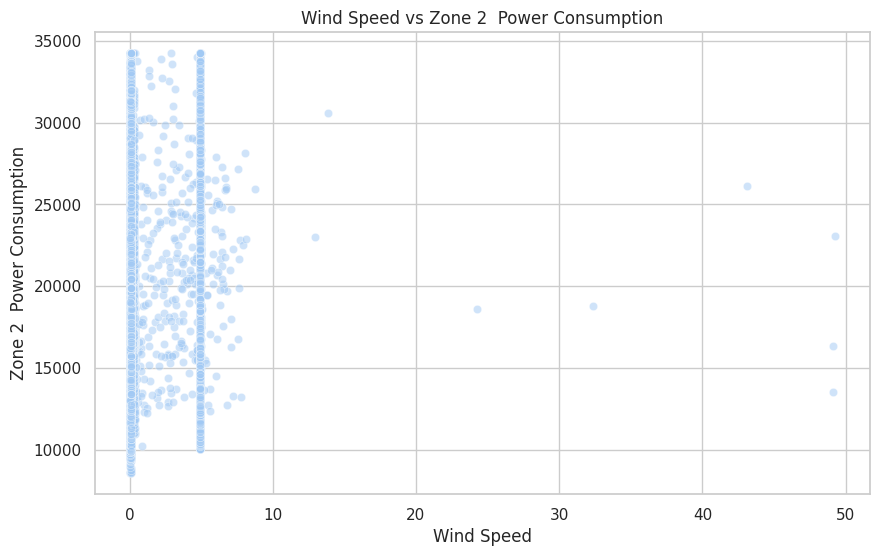

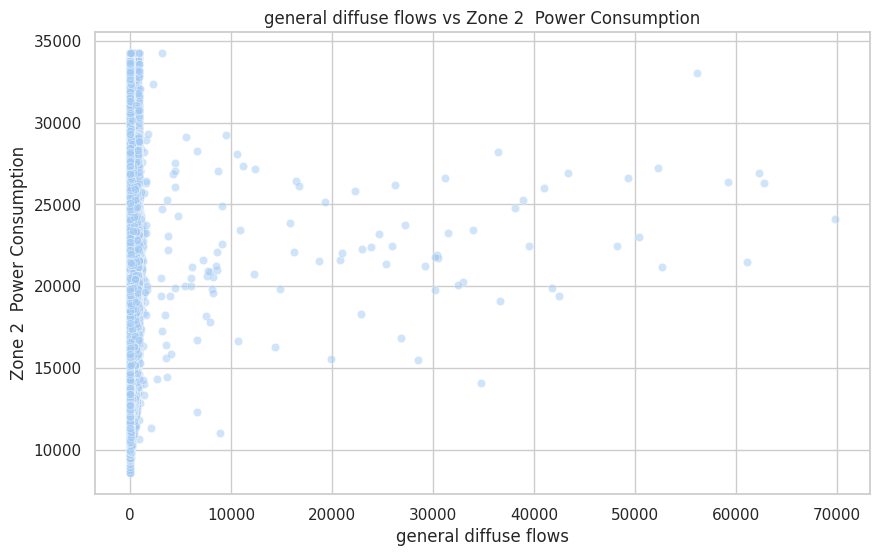

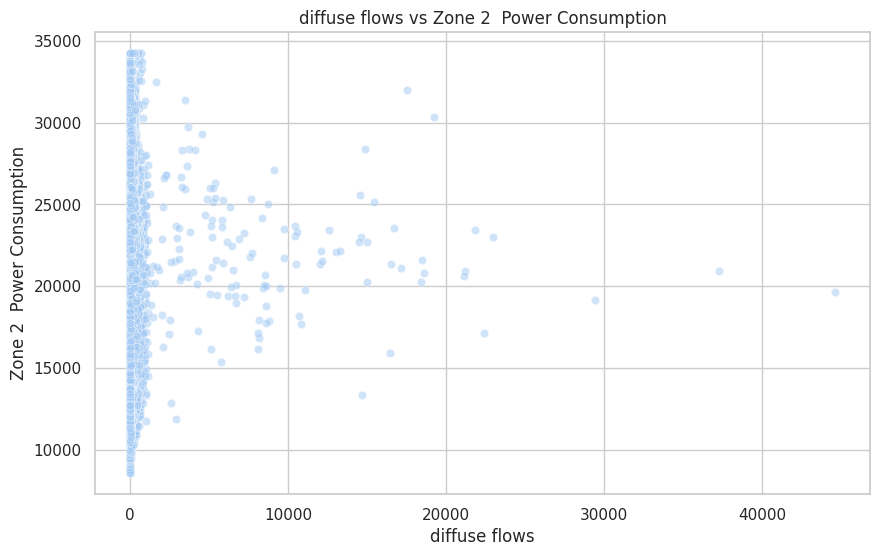

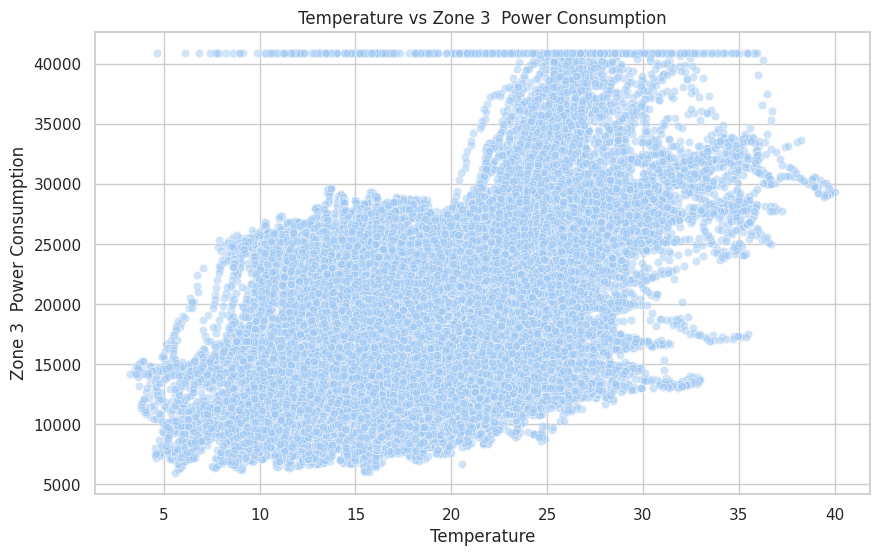

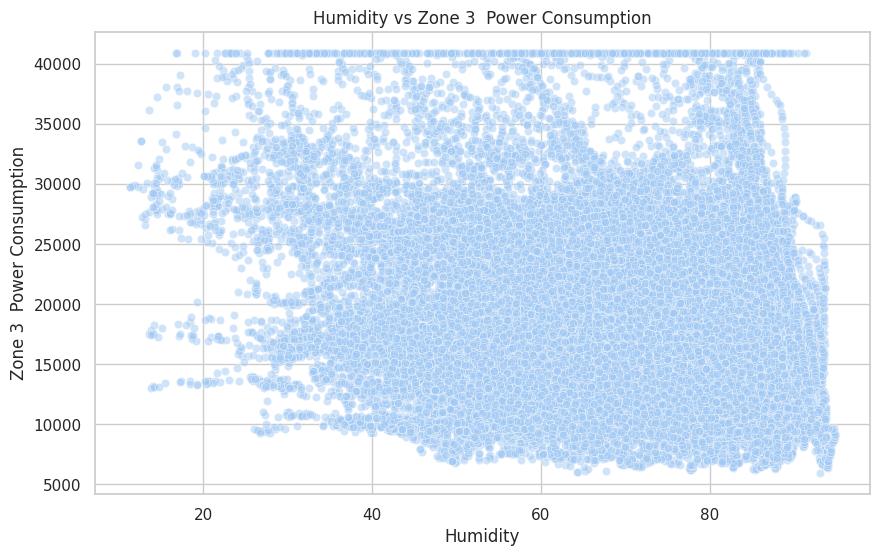

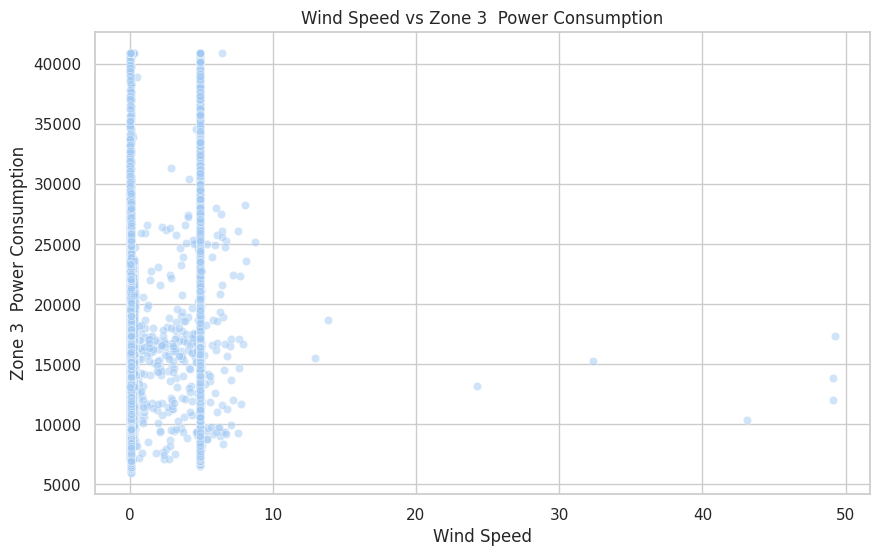

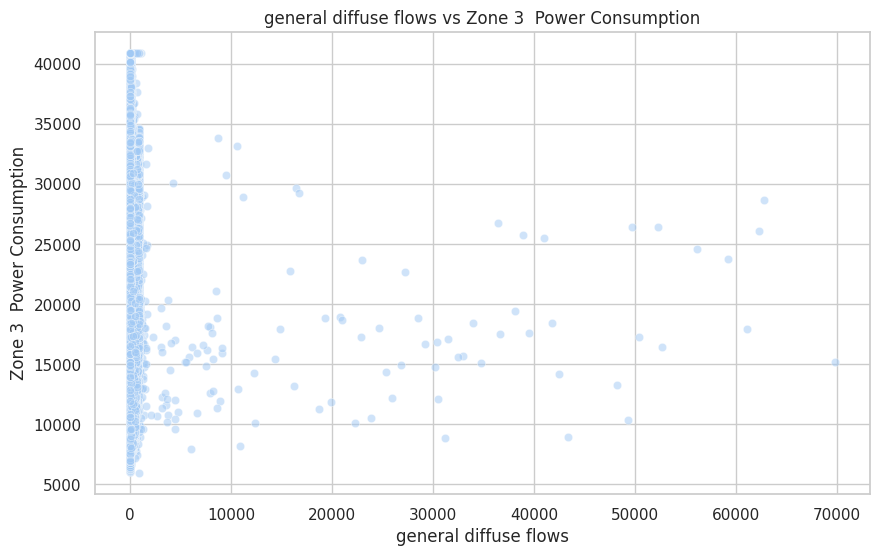

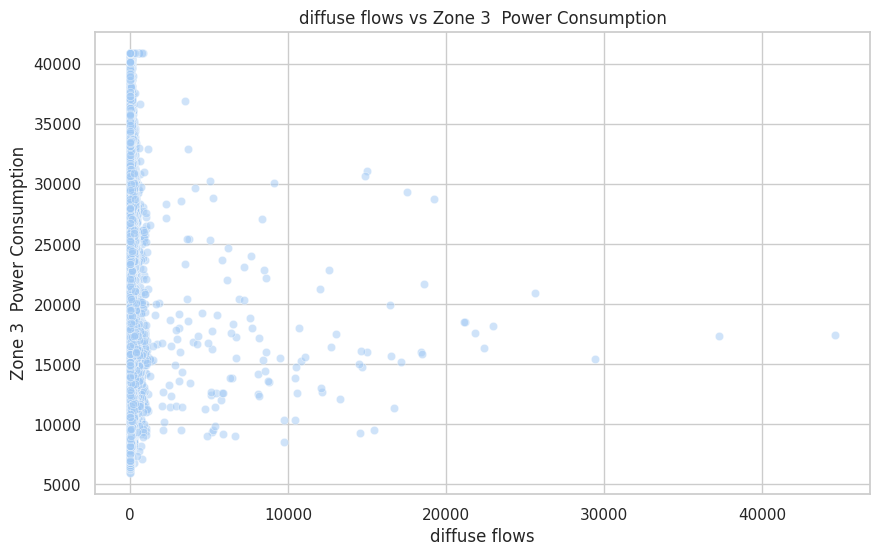

In [29]:
# ==== 10. Relaciones bivariadas (ejemplo: temperatura vs consumo) ====

# Relaciones clave con el consumo
features = ["Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]
targets = ["Zone 1 Power Consumption", "Zone 2  Power Consumption", "Zone 3  Power Consumption"]

for t in targets:
    for f in features:
        plt.figure()
        sns.scatterplot(data=df, x=f, y=t, alpha=0.5)
        plt.title(f"{f} vs {t}")
        plt.show()

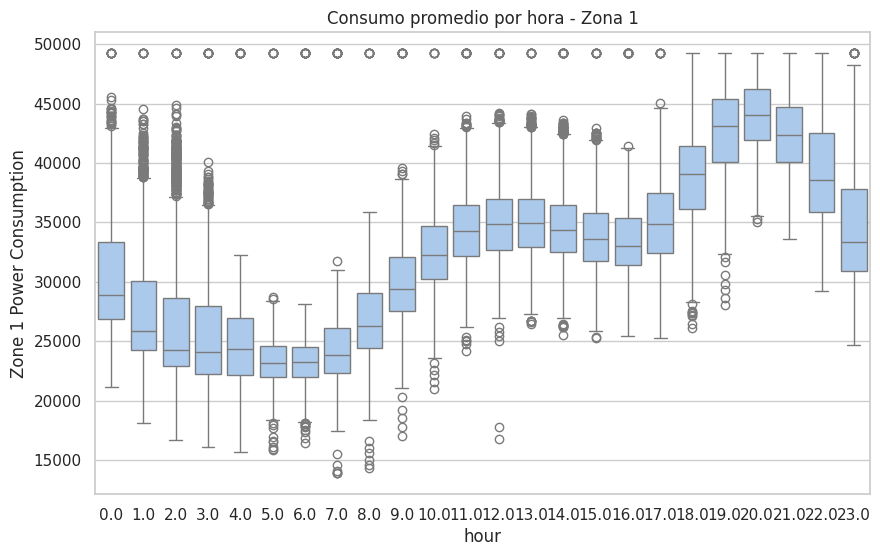

In [30]:
# ==== 11. Análisis temporal por hora del día ====
df['hour'] = df['DateTime'].dt.hour
sns.boxplot(x='hour', y='Zone 1 Power Consumption', data=df)
plt.title('Consumo promedio por hora - Zona 1')
plt.show()

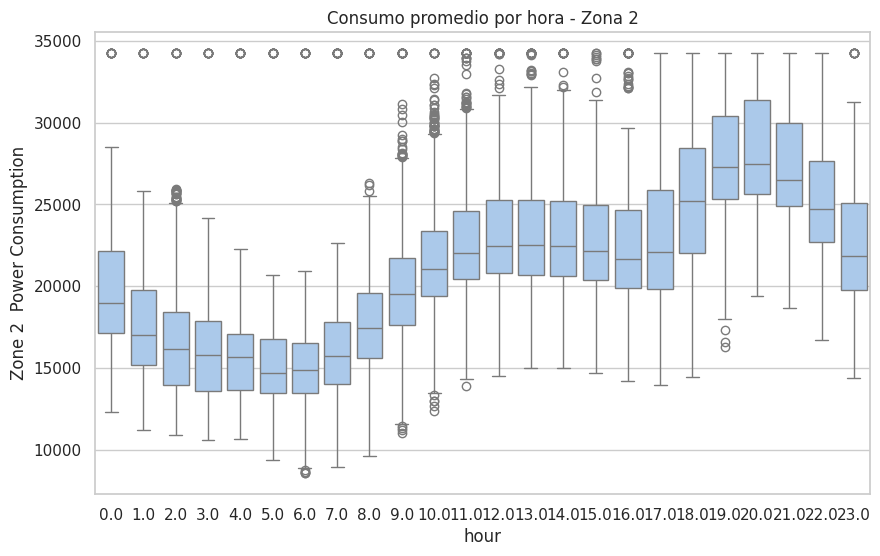

In [31]:
df['hour'] = df['DateTime'].dt.hour
sns.boxplot(x='hour', y='Zone 2  Power Consumption', data=df)
plt.title('Consumo promedio por hora - Zona 2')
plt.show()

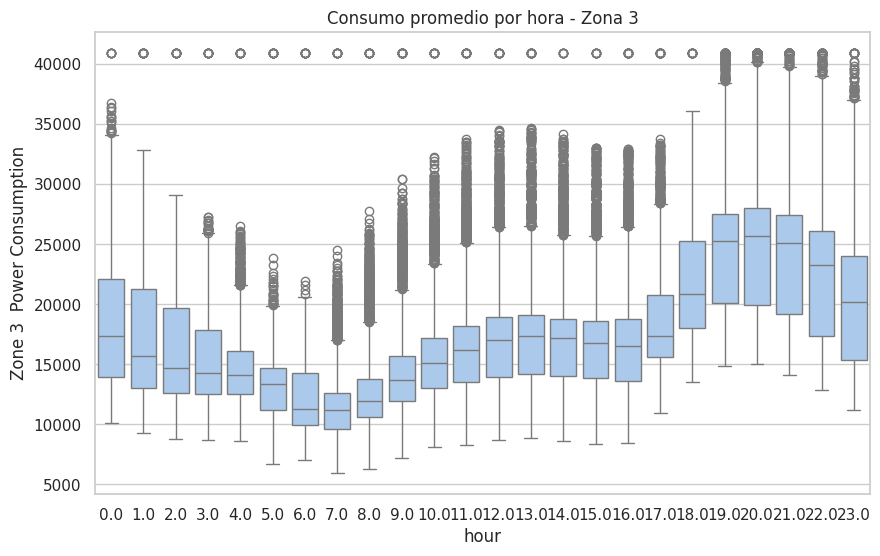

In [32]:
df['hour'] = df['DateTime'].dt.hour
sns.boxplot(x='hour', y='Zone 3  Power Consumption', data=df)
plt.title('Consumo promedio por hora - Zona 3')
plt.show()

## Limpieza de datos

In [65]:
# Eliminar duplicados
df = df.drop_duplicates()

In [66]:
# Detección básica de outliers (por z-score)
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=0)
print("Número de posibles outliers por columna:\n", outliers)

Número de posibles outliers por columna:
 [0 0 0 0 0 0 0 0 0]


In [67]:
print("\nValores nulos por columna:\n", df.isnull().sum())
print("\nDuplicados en el dataset:", df.duplicated().sum())


Valores nulos por columna:
 DateTime                       508
Temperature                   1328
Humidity                      1397
Wind Speed                    1154
general diffuse flows          824
diffuse flows                  807
Zone 1 Power Consumption       801
Zone 2  Power Consumption      788
Zone 3  Power Consumption      748
mixed_type_col               16019
dtype: int64

Duplicados en el dataset: 0


In [68]:
for col in ['Temperature', 'Humidity', 'Wind Speed']:
    df[col] = df[col].interpolate()

In [69]:
df['hour'] = df['DateTime'].dt.hour
for col in ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']:
    df[col] = df.groupby('hour')[col].transform(lambda x: x.fillna(x.mean()))

In [70]:
if 'mixed_type_col' in df.columns:
    df.drop(columns=['mixed_type_col'], inplace=True)
    print("Columna 'mixed_type_col' eliminada exitosamente.\n")

df = df.dropna(subset=['DateTime'])
print(f"Registros eliminados por DateTime nulo: {df['DateTime'].isna().sum()}")

print("\nValores nulos por columna después de limpieza final:")
print(df.isna().sum())

df.reset_index(drop=True, inplace=True)

Columna 'mixed_type_col' eliminada exitosamente.

Registros eliminados por DateTime nulo: 0

Valores nulos por columna después de limpieza final:
DateTime                       0
Temperature                    0
Humidity                       0
Wind Speed                     0
general diffuse flows        819
diffuse flows                802
Zone 1 Power Consumption       0
Zone 2  Power Consumption      0
Zone 3  Power Consumption      0
hour                           0
dtype: int64


In [71]:
# Convertimos DateTime a índice para permitir interpolación por tiempo
df = df.set_index('DateTime')
df = df.sort_index()  # muy importante asegurar orden temporal

In [72]:
is_night = (df['hour'] >= 19) | (df['hour'] < 5)

# Radiación nocturna → asignar 0
for col in ['general diffuse flows', 'diffuse flows']:
    df.loc[is_night & df[col].isna(), col] = 0

# Radiación diurna → imputación por interpolación temporal
for col in ['general diffuse flows', 'diffuse flows']:
    df[col] = df[col].interpolate(method='time')

# Si queda algún NA residual (raro), forward-fill/backfill
df[['general diffuse flows', 'diffuse flows']] = df[['general diffuse flows', 'diffuse flows']].fillna(method='bfill').fillna(method='ffill')

# 6. Regresar el índice
df = df.reset_index()

/tmp/ipython-input-950211733.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['general diffuse flows', 'diffuse flows']] = df[['general diffuse flows', 'diffuse flows']].fillna(method='bfill').fillna(method='ffill')


In [73]:
PATH = '/gdrive/MyDrive/Colab Notebooks/MLOps/data/f1/power_tetouan_city_modified_clean.csv'
df.to_csv(PATH, index=False)

In [75]:
from sklearn.preprocessing import RobustScaler

# Seleccionamos columnas numéricas relevantes (omitimos DateTime)
num_cols = ['Temperature', 'Humidity', 'Wind Speed',
            'general diffuse flows', 'diffuse flows',
            'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

# Inicializamos el escalador robusto
scaler = RobustScaler()

# Aplicamos el escalador y generamos nuevo DataFrame normalizado
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Verificamos los resultados
print("\nResumen estadístico después de la normalización:\n")
display(df_scaled[num_cols].describe().round(3))



Resumen estadístico después de la normalización:



Temperature   Humidity  Wind Speed  general diffuse flows  \
count    52889.000  52889.000   52889.000              52889.000   
mean         0.003     -0.069       0.391                  0.674   
std          0.685      0.673       0.495                  3.767   
min         -1.831     -2.533      -0.007                 -0.019   
25%         -0.515     -0.500      -0.002                 -0.019   
50%          0.000      0.000       0.000                  0.000   
75%          0.485      0.500       0.998                  0.981   
max          2.499      1.080      10.162                212.170   

       diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
count      52889.000                 52889.000                  52889.000   
mean           0.907                     0.008                      0.029   
std            5.542                     0.652                      0.675   
min           -0.056                    -1.675                     -1.587   
25%           -0.055                    -0.541                     -0.498   
50%            0.000                     0.000                      0.000   
75%            0.945                     0.459                      0.502   
max          430.564                     1.531                      1.721   

       Zone 3  Power Consumption  
count                  52889.000  
mean                       0.172  
std                        0.783  
min                       -1.227  
25%                       -0.382  
50%                        0.000  
75%                        0.618  
max                        2.853

In [76]:
PATH = '/gdrive/MyDrive/Colab Notebooks/MLOps/data/f1/power_tetouan_city_modified_scaled.csv'
df_scaled.to_csv(PATH, index=False)

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Seleccionamos solo las columnas numéricas relevantes
features = ['Temperature', 'Humidity', 'Wind Speed',
            'general diffuse flows', 'diffuse flows',
            'Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']

X = df_scaled[features].dropna()

# Creamos el modelo PCA (por defecto todos los componentes)
pca = PCA()
X_pca = pca.fit_transform(X)

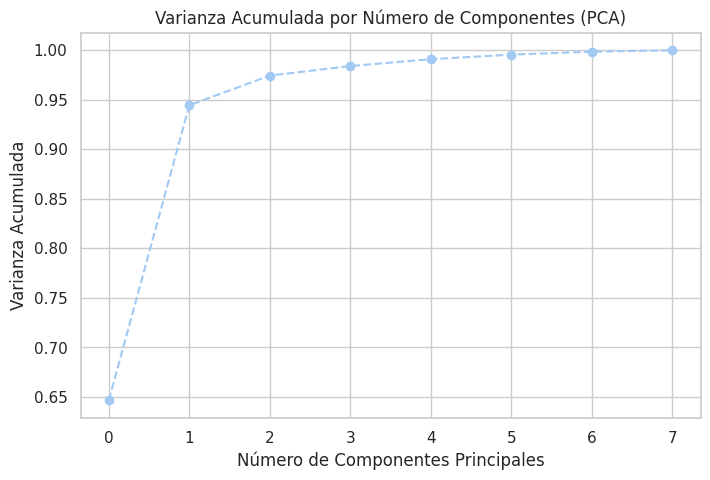

In [78]:
# Calculamos la varianza explicada
explained_var = pca.explained_variance_ratio_

# Graficamos la varianza acumulada
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o', linestyle='--', color='b')
plt.title('Varianza Acumulada por Número de Componentes (PCA)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

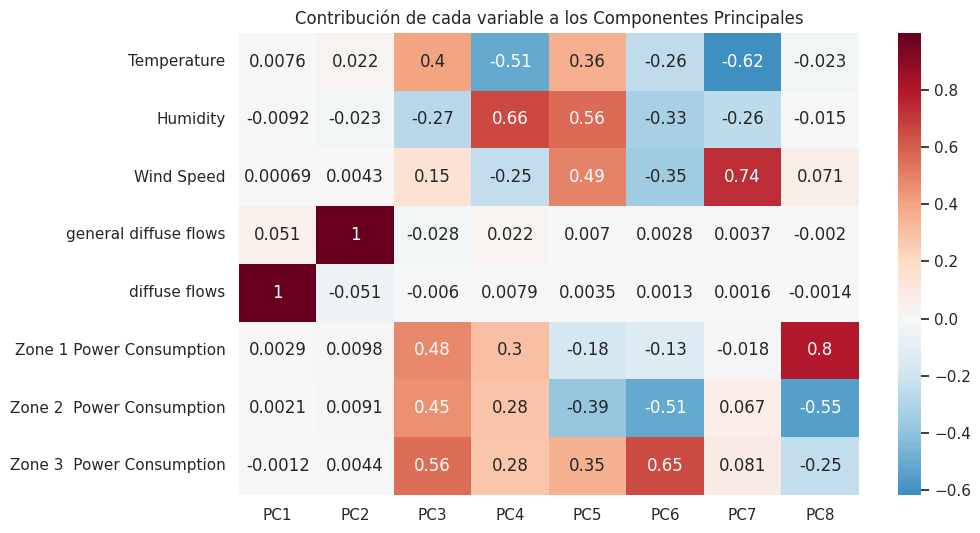

In [79]:
# Visualizamos la contribución de cada variable al primer componente
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)

plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap='RdBu_r', center=0)
plt.title('Contribución de cada variable a los Componentes Principales')
plt.show()

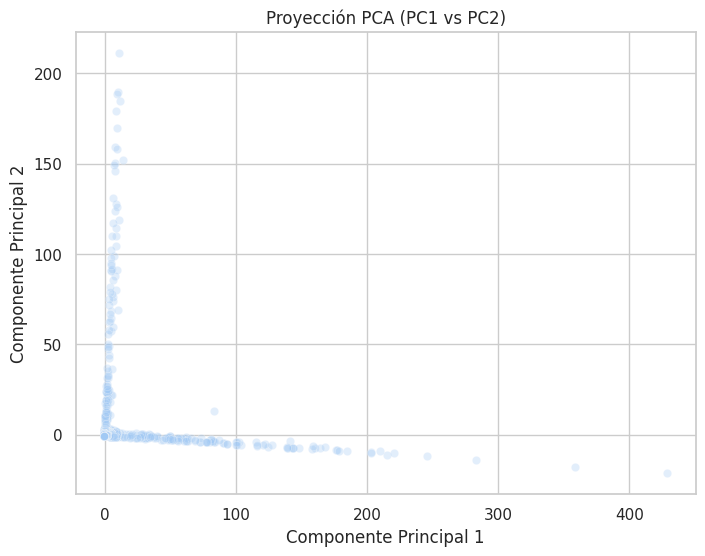

In [80]:
df_pca = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
df_pca['DateTime'] = df_scaled['DateTime'].reset_index(drop=True)

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca, alpha=0.3)
plt.title('Proyección PCA (PC1 vs PC2)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


In [81]:
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var*100:.2f}% de varianza explicada")
print(f"\nVarianza acumulada total: {np.cumsum(explained_var)[-1]*100:.2f}%")

PC1: 64.67% de varianza explicada
PC2: 29.78% de varianza explicada
PC3: 2.99% de varianza explicada
PC4: 0.96% de varianza explicada
PC5: 0.69% de varianza explicada
PC6: 0.46% de varianza explicada
PC7: 0.30% de varianza explicada
PC8: 0.14% de varianza explicada

Varianza acumulada total: 100.00%


# Modelos

In [82]:
from sklearn.model_selection import train_test_split

X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']]
y = df['Zone 1 Power Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [84]:
# @title Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

In [87]:
print("=== Linear REGRESSION ===")
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

=== Linear REGRESSION ===
MAE: 5286.840024937389
RMSE: 6476.399866964638
R2: 0.19261417987492613


In [86]:
# @title Ridge
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
ridge.fit(X_train, y_train)

# Predicción
ridge_pred = ridge.predict(X_test)

# Métricas
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

print("=== RIDGE REGRESSION ===")
print(f"Mejor alpha: {ridge.alpha_}")
print(f"MAE:  {ridge_mae:.3f}")
print(f"RMSE: {ridge_rmse:.3f}")
print(f"R²:   {ridge_r2:.3f}\n")

=== RIDGE REGRESSION ===
Mejor alpha: 1000.0
MAE:  5286.892
RMSE: 6476.428
R²:   0.193



In [88]:
# @title Lasso
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=np.logspace(-3, 3, 20), cv=5, max_iter=10000)
lasso.fit(X_train, y_train)

# Predicción
lasso_pred = lasso.predict(X_test)

# Métricas
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print("=== LASSO REGRESSION ===")
print(f"Mejor alpha: {lasso.alpha_}")
print(f"MAE:  {lasso_mae:.3f}")
print(f"RMSE: {lasso_rmse:.3f}")
print(f"R²:   {lasso_r2:.3f}\n")

=== LASSO REGRESSION ===
Mejor alpha: 1.438449888287663
MAE:  5286.850
RMSE: 6476.405
R²:   0.193



In [89]:
# @title Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

# Mejor modelo encontrado
best_rf = grid_rf.best_estimator_

# Predicción
rf_pred = best_rf.predict(X_test)

# Métricas
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("=== RANDOM FOREST REGRESSOR ===")
print(f"Mejores hiperparámetros: {grid_rf.best_params_}")
print(f"MAE:  {rf_mae:.3f}")
print(f"RMSE: {rf_rmse:.3f}")
print(f"R²:   {rf_r2:.3f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
=== RANDOM FOREST REGRESSOR ===
Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
MAE:  3338.181
RMSE: 4829.441
R²:   0.551


In [90]:
print('Done')

Done
